# Hacktiv8 Intro to Python for Data Science Final Project

## Pembukaan

Online shopping merupakan salah satu bentuk transaksi yang terbesar dan merepresentasikan mayoritas revenue dari usaha B2C (Business to Customer). 69% warga Amerika telah menggunakan fasilitas online dalam hidupnya, dengan rata-rata revenue sebesar $1804 setiap pembelanja online. 36% warga Amerika melakukan online shopping minimal sekali dalam sebulan. Mempelajari bagaimana dan kapan pembelanja akan melakukan research dan pembelian merupakan hal yang sangat penting untuk bisnis, melalui itu mereka dapat mempelajari karakteristik dan perilaku pembelanja dan dapat dijadikan strategi advertising, marketing dan pencarian potensial customer baru untuk memperbesar revenue dan profit perusahaan.

## Data:

Data ini terdiri dari 18 feature: 10 numerikal dan 8 kategorikal. Dataset ini memiliki 12330 entries, terbagi menjadi 10422 entries dimana pembelanja tidak melakukan pembelian dan 1908 melakukan pembelian. Data ini diambil dalam jangka waktu selama 1 tahun dan setiap entries diambil dari individu yang berbeda.

## Tujuan:

Mempelajari persebaran data dari dataset pembelanja online dan feature - feature apa saja yang dapat mempengaruhi pembelanja dalam melakukan pembelian barang online menggunakan metode machine learning dengan akurasi tertinggi

## Mempersiapkan dan Mempelajari Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('online_shoppers_intention.csv')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

#### Deskripsi Kolom:

- Administrative: Jumlah halaman administratif yang dikunjungi oleh user.

- Administrative_Duration: Jumlah waktu yang dihabiskan oleh user di halaman-halaman kategori administratif.

- Informational: Jumlah halaman yang berisi informasi produk yang dikunjungi oleh user.

- Informational_Duration: Jumlah waktu yang dihabiskan oleh user pada halaman-halaman yang berisi informasi produk.

- ProductRelated: Jumlah halaman mengenai produk-produk yang berelasi yang telah dikunjungi user.

- ProductRelated_Duration: Jumlah waktu yang dihabiskan waktu oleh user dalam mengunjungi halaman yang berelasi dengan produk.

- BounceRates: Persentase dari pengunjung yang masuk ke halaman website tersebut tanpa melakukan apa-apa dan keluar dari website.

- ExitRates: Persentase dari pageview pada website tersebut yang berakhir dalam salah satu halaman.

- PageValues: Rata-rata dari value halaman tersebut yang berkontribusi dalam penyelesaian suatu pembelian barang online

- SpecialDay: Nilai ini merepresentasikan kedekatan waktu user browsing dengan hari khusus atau libur (Hari Valentine atau Natal).

- Month: Bulan dimana user membuka halaman tersebut, dalam bentuk string.

- OperatingSystems: Nilai integer yang merepresentasikan jenis OS yang digunakan user.

- Browser: Nilai integer yang merepresentasikan jenis browser yang digunakan user.

- Region: Nilai integer yang merepresentasikan daerah dari user.

- TrafficType: Nilai integer yang merepresentasikan jenis traffic user yang telah dikategorikan.

- VisitorType: Sebuah string yang membagi user menjadi tiga yaitu New Visitor (Pengunjung baru), Returning Visitor (Pengjung lama, atau Other(Dan lainnya).

- Weekend: Sebuah data boolean yang merepresentasikan hari user tersebut online di weekdays atau weekends.

- Revenue: Sebuah data boolean yang merepresentasikan apakah user melakukan pembelian atau tidak, data ini yang nanti dapat digunakan sebagai label atau dependent variable.

Mengecek data apa saja yang ada pada tiap kolom:

In [4]:
df['Administrative'].unique()

array([ 0,  1,  2,  4, 12,  3, 10,  6,  5,  9,  8, 16, 13, 11,  7, 18, 14,
       17, 19, 15, 24, 22, 21, 20, 23, 27, 26], dtype=int64)

In [5]:
df['Administrative_Duration'].unique()

array([  0.       ,  53.       ,  64.6      , ..., 167.9107143,
       305.125    , 150.3571429])

In [6]:
df['Informational'].unique()

array([ 0,  1,  2,  4, 16,  5,  3, 14,  6, 12,  7,  9, 10,  8, 11, 24, 13],
      dtype=int64)

In [7]:
df['Informational_Duration'].unique()

array([  0.  , 120.  ,  16.  , ..., 547.75, 368.25, 211.25])

In [8]:
df['ProductRelated'].unique()

array([  1,   2,  10,  19,   0,   3,  16,   7,   6,  23,  13,  20,   8,
         5,  32,   4,  45,  14,  52,   9,  46,  15,  22,  11,  12,  36,
        42,  27,  90,  18,  38,  17, 128,  25,  30,  21,  51,  26,  28,
        31,  24,  50,  96,  49,  68,  98,  67,  55,  35,  37,  29,  34,
        71,  63,  87,  40,  33,  54,  64,  75,  39, 111,  81,  61,  47,
        44,  88, 149,  41,  79,  66,  43, 258,  80,  62,  83, 173,  48,
        58,  57,  56,  69,  82,  59, 109, 287,  53,  84,  78, 137, 113,
        89,  65,  60, 104, 129,  77,  74,  93,  76,  72, 194, 140, 110,
       132, 115,  73, 328, 160,  86, 150,  95, 130, 151, 117, 124, 127,
       125, 116, 105,  92, 157, 154, 220, 187, 112, 131, 159,  94, 204,
       142, 206, 102, 313, 145,  85,  97, 198, 181, 126, 106, 101, 108,
       119,  70, 122,  91, 276, 100, 291, 114, 172, 217, 141, 133, 156,
       136, 180, 135, 195,  99, 362, 179, 118, 175, 148, 440, 103, 178,
       184, 705, 134, 176, 146, 189, 120, 193, 222, 121, 107, 30

In [9]:
df['ProductRelated_Duration'].unique()

array([  0.        ,  64.        ,   2.66666667, ..., 465.75      ,
       184.25      , 346.        ])

In [10]:
df['BounceRates'].unique()

array([0.2       , 0.        , 0.05      , ..., 0.00382775, 0.00086956,
       0.01114899])

In [11]:
df['ExitRates'].unique()

array([0.2       , 0.1       , 0.14      , ..., 0.01276133, 0.01395349,
       0.02903061])

In [12]:
df['PageValues'].unique()

array([ 0.        , 54.17976426, 19.44707913, ..., 78.81172527,
        3.68540082, 12.24171745])

In [13]:
df['SpecialDay'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

In [14]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [15]:
df['OperatingSystems'].unique()

array([1, 2, 4, 3, 7, 6, 8, 5], dtype=int64)

In [16]:
df['Browser'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64)

In [17]:
df['Region'].unique()

array([1, 9, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [18]:
df['TrafficType'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20], dtype=int64)

In [19]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [20]:
df['Weekend'].unique()

array([False,  True])

In [21]:
df['Revenue'].unique()

array([False,  True])

## Exploratory Data Analysis

In [22]:
df.shape

(12330, 18)

In [107]:
df.isnull().any()
# Tidak ada missing values

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

### Analisis Menggunakan Satu Variabel

In [24]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [108]:
df['Revenue'].value_counts(normalize=True)*100

0    84.525547
1    15.474453
Name: Revenue, dtype: float64

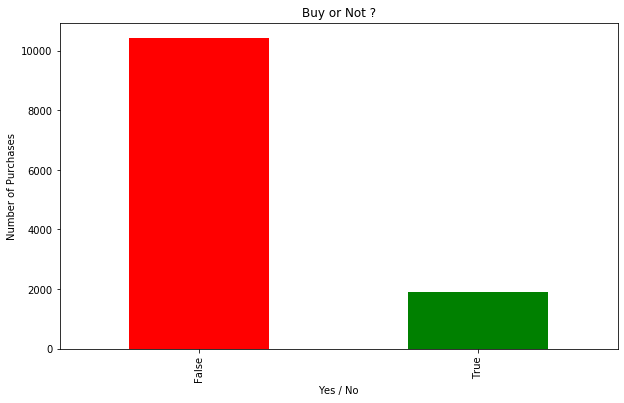

In [25]:
df['Revenue'].value_counts().plot(kind='bar', figsize=(10, 6), color=['red', 'green'])

plt.title('Buy or Not ?')
plt.ylabel('Number of Purchases')
plt.xlabel('Yes / No')

plt.show()

Dari seluruh data yang didapatkan,
- Hanya terjadi 1908 pembelian dari total 12330 pengunjung situs online (15,47%)

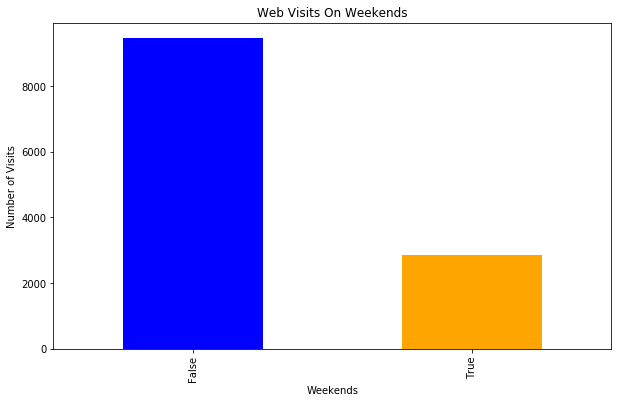

In [26]:
df['Weekend'].value_counts().plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])

plt.title('Web Visits On Weekends')
plt.ylabel('Number of Visits')
plt.xlabel('Weekends')

plt.show()

Berdasarkan grafik diatas dapat terlihat bahwa lebih banyak pengunjung situs online shopping pada weekdays dibandingkan weekends

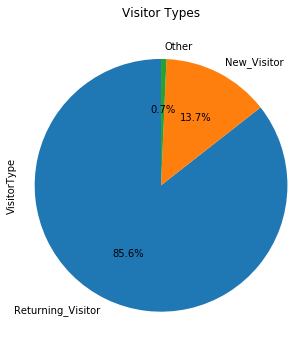

In [27]:
df['VisitorType'].value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            startangle=90,
                            autopct='%1.1f%%'
                           )

plt.title('Visitor Types')
plt.axis('equal')

plt.show()

Dari grafik tersebut dapat dilihat mayoritas pengunjung adalah returning visitor atau pengunjung lama, dengan pembagian:
- Pengunjung lama 85,6 %
- Pengunjung baru 13,7 %
- Dan lainnya 0,7%

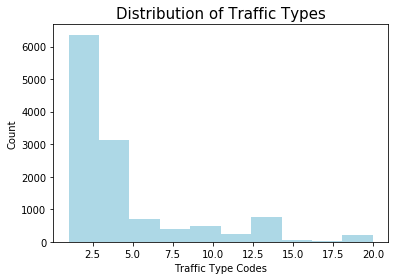

In [28]:
plt.subplot(1, 1, 1)
plt.hist(df['TrafficType'], color = 'lightblue')
plt.title('Distribution of Traffic Types',fontsize = 15)
plt.xlabel('Traffic Type Codes', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

plt.show()

Pengunjung situs online terbanyak berasal dari user dengan kategori 1

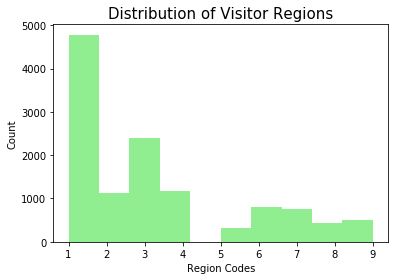

In [29]:
plt.subplot(1, 1, 1)
plt.hist(df['Region'], color = 'lightgreen')
plt.title('Distribution of Visitor Regions',fontsize = 15)
plt.xlabel('Region Codes', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

plt.show()

Dari grafik diatas dapat disimpulkan pengunjung situs online terbanyak dari region dengan kode 1

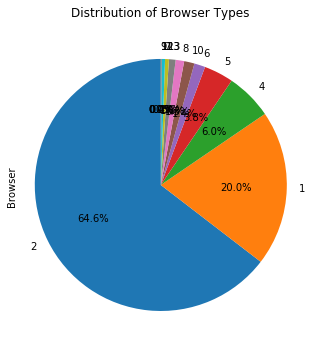

In [30]:
df['Browser'].value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            startangle=90,
                            autopct='%1.1f%%'
                           )

plt.title('Distribution of Browser Types')
plt.axis('equal')

plt.show()

Terlihat dari pie chart, pengunjung mayoritas besar menggunakan browser nomer 2 dengan persentase sebesar 64.6%

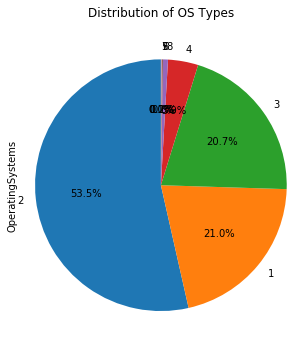

In [32]:
df['OperatingSystems'].value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            startangle=90,
                            autopct='%1.1f%%'
                           )

plt.title('Distribution of OS Types')
plt.axis('equal')

plt.show()

Dan Operating System yang paling banyak digunakan adalah OS nomer 2

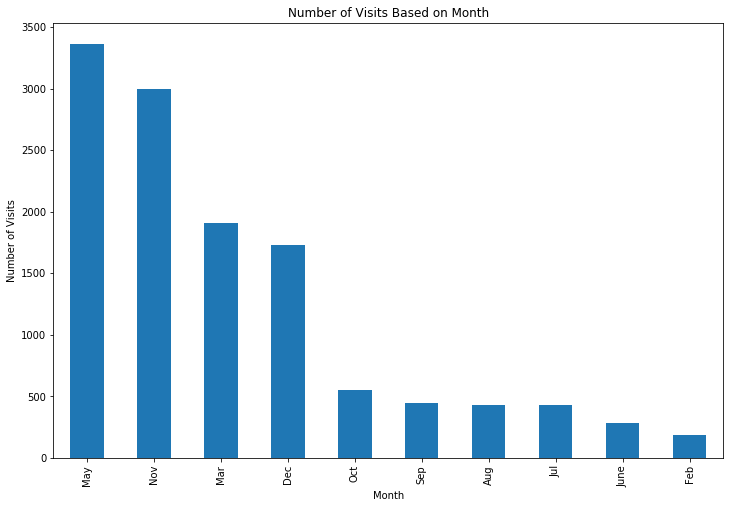

In [33]:
df['Month'].value_counts().plot(kind='bar', figsize=(12, 8))

plt.title('Number of Visits Based on Month')
plt.ylabel('Number of Visits')
plt.xlabel('Month')

plt.show()

Pengunjung online terbanyak dilakukan pada bulan Mei diikuti dengan November dan Maret

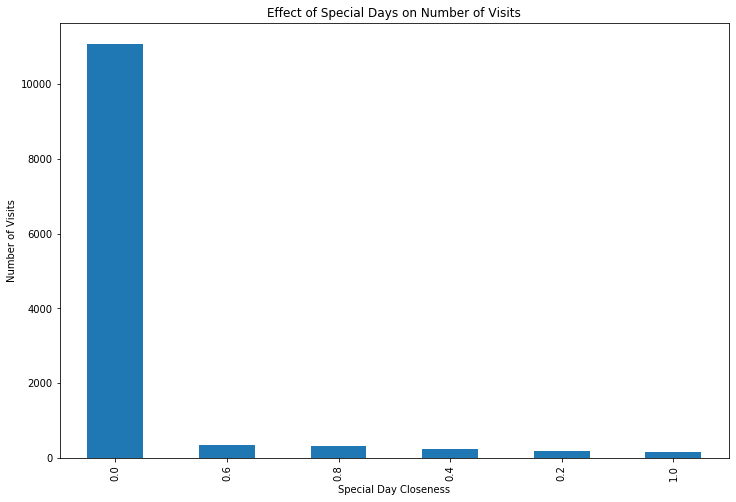

In [34]:
df['SpecialDay'].value_counts().plot(kind='bar', figsize=(12, 8))

plt.title('Effect of Special Days on Number of Visits')
plt.ylabel('Number of Visits')
plt.xlabel('Special Day Closeness')

plt.show()

Dari grafik diatas dapat dilihat bahwa pengunjung terbanyak berasal dari hari yang tidak dekat dengan hari khusus ataupun hari libur

### Analisis Menggunakan Dua Variabel

#### Jumlah halaman yang dikunjungi vs Revenue (Pembelian)

In [36]:
import seaborn as sns

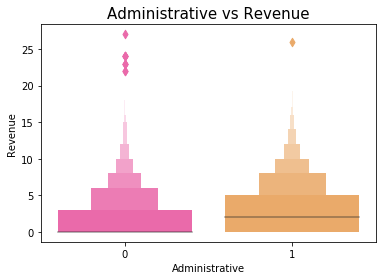

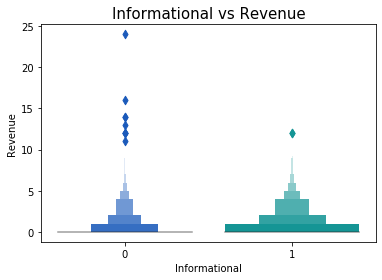

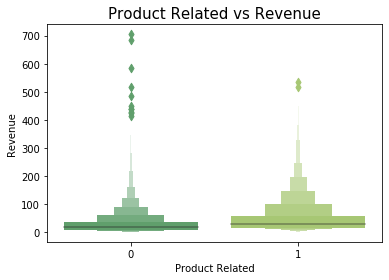

In [114]:
sns.boxenplot(df['Revenue'], df['Administrative'], palette = 'spring')
plt.title('Administrative vs Revenue', fontsize = 15)
plt.xlabel('Administrative', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

plt.show()

sns.boxenplot(df['Revenue'], df['Informational'], palette = 'winter')
plt.title('Informational vs Revenue', fontsize = 15)
plt.xlabel('Informational', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)


plt.show()

sns.boxenplot(df['Revenue'], df['ProductRelated'], palette = 'summer')
plt.title('Product Related vs Revenue', fontsize = 15)
plt.xlabel('Product Related', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)


plt.show()

Persebaran jumlah halaman yang dikunjungi jika dibandingkan dengan revenue(Pembelian). 

#### Duration vs Revenue

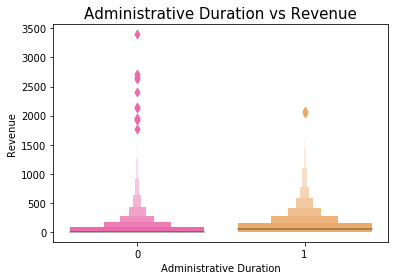

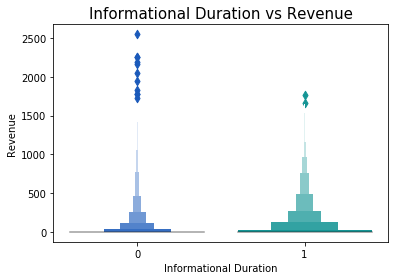

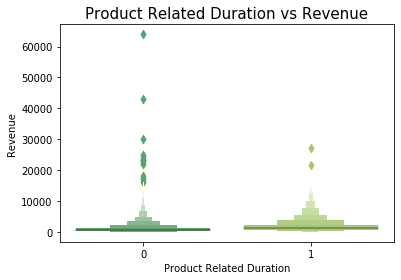

In [115]:
sns.boxenplot(df['Revenue'], df['Administrative_Duration'], palette = 'spring')
plt.title('Administrative Duration vs Revenue', fontsize = 15)
plt.xlabel('Administrative Duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

plt.show()

sns.boxenplot(df['Revenue'], df['Informational_Duration'], palette = 'winter')
plt.title('Informational Duration vs Revenue', fontsize = 15)
plt.xlabel('Informational Duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)


plt.show()

sns.boxenplot(df['Revenue'], df['ProductRelated_Duration'], palette = 'summer')
plt.title('Product Related Duration vs Revenue', fontsize = 15)
plt.xlabel('Product Related Duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)


plt.show()


Persebaran lamanya durasi user dalam mengunjungi halaman dibandingkan dengan revenue(Pembelian).

#### Google Analytic vs Revenue

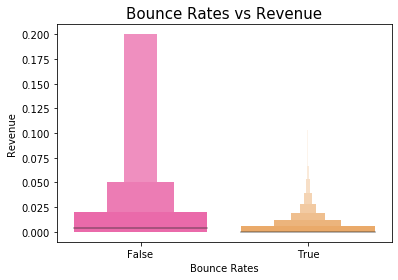

In [50]:
sns.boxenplot(df['Revenue'], df['BounceRates'], palette = 'spring')
plt.title('Bounce Rates vs Revenue', fontsize = 15)
plt.xlabel('Bounce Rates', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)


plt.show()

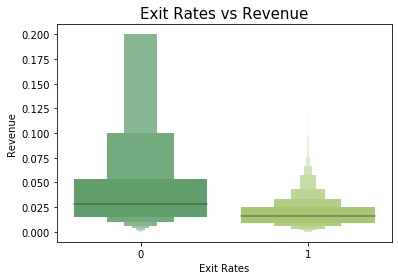

In [116]:
sns.boxenplot(df['Revenue'], df['ExitRates'], palette = 'summer')
plt.title('Exit Rates vs Revenue', fontsize = 15)
plt.xlabel('Exit Rates', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)


plt.show()

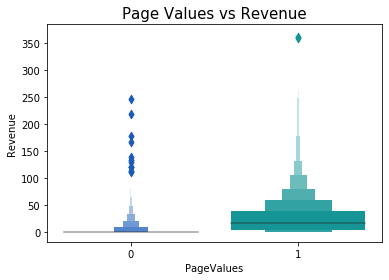

In [117]:
sns.boxenplot(df['Revenue'], df['PageValues'], palette = 'winter')
plt.title('Page Values vs Revenue', fontsize = 15)
plt.xlabel('PageValues', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)


plt.show()

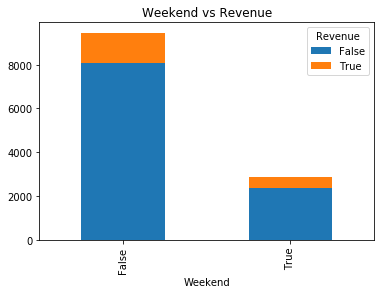

In [57]:
pd.crosstab(df['Weekend'],df['Revenue']).plot(kind='bar',stacked=True)
plt.title('Weekend vs Revenue')
plt.show()

Dapat dilihat pada grafik bahwa pembelian online juga lebih banyak dilakukan pada weekdays dibanding weekend

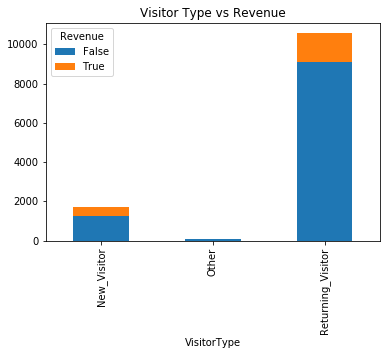

In [58]:
pd.crosstab(df['VisitorType'],df['Revenue']).plot(kind='bar',stacked=True)
plt.title('Visitor Type vs Revenue')
plt.show()

Dapat dilihat pada grafik bahwa pembelian online juga mayoritas berasal dari pengunjung lama

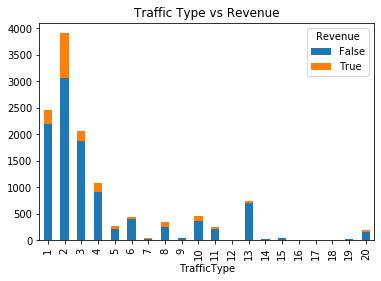

In [59]:
pd.crosstab(df['TrafficType'],df['Revenue']).plot(kind='bar',stacked=True)
plt.title('Traffic Type vs Revenue')
plt.show()

Pembelian terbanyak juga berasal dari user traffic kode 2

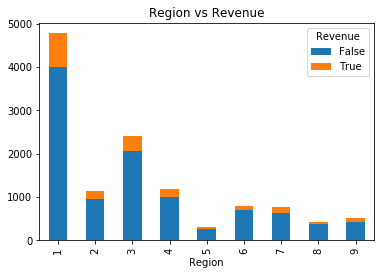

In [60]:
pd.crosstab(df['Region'],df['Revenue']).plot(kind='bar',stacked=True)
plt.title('Region vs Revenue')
plt.show()

Sama seperti pengunjungnya, pembelian terbanyak juga berasal dari region 1

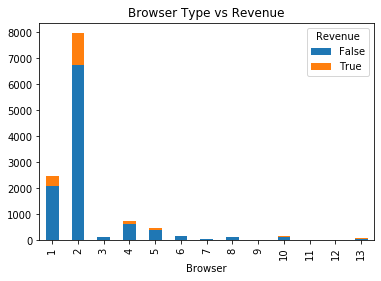

In [61]:
pd.crosstab(df['Browser'],df['Revenue']).plot(kind='bar',stacked=True)
plt.title('Browser Type vs Revenue')
plt.show()

Browser dengan pembelian terbanyak juga berasal dari browser 2

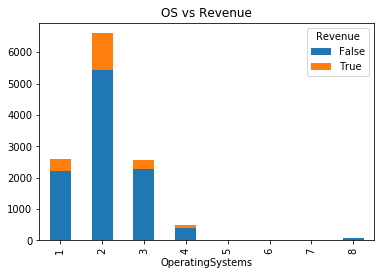

In [62]:
pd.crosstab(df['OperatingSystems'],df['Revenue']).plot(kind='bar',stacked=True)
plt.title('OS vs Revenue')
plt.show()

OS 2 merupakan OS mayoritas yang digunakan oleh pembeli

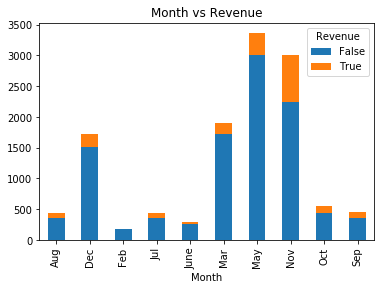

In [63]:
pd.crosstab(df['Month'],df['Revenue']).plot(kind='bar',stacked=True)
plt.title('Month vs Revenue')
plt.show()

Berbeda dengan pengunjung dimana terbanyak pada bulan Mei, pembelian terbanyak terjadi pada bulan November

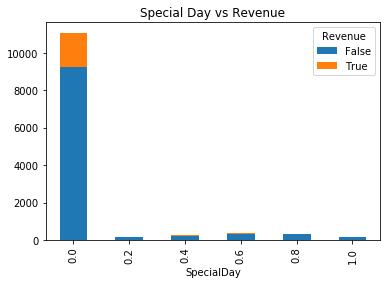

In [64]:
pd.crosstab(df['SpecialDay'],df['Revenue']).plot(kind='bar',stacked=True)
plt.title('Special Day vs Revenue')
plt.show()

Pembelian terbanyak juga terjadi dimana tidak berdekatan dengan hari khusus atau libur

### Korelasi antar Features

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
label = LabelEncoder()
df['Revenue'] = label.fit_transform(df['Revenue'])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


In [68]:
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1,0.601583,0.37685,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.0989896,-0.0947776,-0.00634706,-0.0250346,-0.00548681,-0.0335607,0.0264168,0.138917
Administrative_Duration,0.601583,1,0.30271,0.238031,0.289087,0.355422,-0.14417,-0.205798,0.0676085,-0.0733037,-0.00734342,-0.0153915,-0.00556056,-0.0143764,0.0149901,0.0935867
Informational,0.37685,0.30271,1,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.0486317,-0.0482193,-0.00952667,-0.0382347,-0.0291686,-0.0344908,0.0357847,0.0952003
Informational_Duration,0.255848,0.238031,0.618955,1,0.280046,0.347364,-0.0740666,-0.105276,0.0308609,-0.0305765,-0.00957868,-0.019285,-0.0271441,-0.0246749,0.0240785,0.0703445
ProductRelated,0.431119,0.289087,0.374164,0.280046,1,0.860927,-0.204578,-0.292526,0.0562818,-0.0239582,0.00428962,-0.0131457,-0.0381218,-0.0430643,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1,-0.184541,-0.251984,0.0528231,-0.0363798,0.00297579,-0.00738044,-0.0330905,-0.0363772,0.00731061,0.152373
BounceRates,-0.223563,-0.14417,-0.116114,-0.0740666,-0.204578,-0.184541,1,0.913004,-0.119386,0.0727023,0.0238232,-0.0157722,-0.00648535,0.0782855,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1,-0.174498,0.102242,0.0145667,-0.00444236,-0.00890701,0.0786163,-0.062587,-0.207071
PageValues,0.0989896,0.0676085,0.0486317,0.0308609,0.0562818,0.0528231,-0.119386,-0.174498,1,-0.0635413,0.0185079,0.0455919,0.0113153,0.0125317,0.0120016,0.492569
SpecialDay,-0.0947776,-0.0733037,-0.0482193,-0.0305765,-0.0239582,-0.0363798,0.0727023,0.102242,-0.0635413,1,0.0126522,0.00349875,-0.016098,0.0523014,-0.0167672,-0.0823046


Variabel yang memiliki korelasi terbesar adalah PageValues dengan 0.49

## Persiapan Model Machine Learning

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
feature = LabelEncoder()
df['Month'] = feature.fit_transform(df['Month'])
df['VisitorType'] = feature.fit_transform(df['VisitorType'])
df['Weekend'] = feature.fit_transform(df['Weekend'])

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [72]:
X = df.drop(['Revenue'], axis = 1)
y = df['Revenue']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [74]:
from sklearn.linear_model import LogisticRegression 

model=LogisticRegression() 

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_pred_log = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
print(accuracy_score(y_test,y_pred_log)) 
matrix1=confusion_matrix(y_test,y_pred_log) 
print(matrix1)

0.8864557988645579
[[2037   54]
 [ 226  149]]


In [77]:
from sklearn import tree
dt=tree.DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
y_pred_dt = dt.predict(X_test)

In [83]:
print(accuracy_score(y_test,y_pred_dt)) 
matrix2=confusion_matrix(y_test,y_pred_dt) 
print(matrix2)

0.8657745336577454
[[1906  185]
 [ 146  229]]


In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
y_pred_rand = rf.predict(X_test)

In [82]:
print(accuracy_score(y_test,y_pred_rand)) 
matrix3=confusion_matrix(y_test,y_pred_rand) 
print(matrix3)

0.9006488240064883
[[2012   79]
 [ 166  209]]


In [85]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [86]:
y_pred_svm = model_svm.predict(X_test)

In [87]:
print(accuracy_score(y_test,y_pred_svm)) 
matrix4=confusion_matrix(y_test,y_pred_svm) 
print(matrix4)

0.8479318734793188
[[2091    0]
 [ 375    0]]


In [88]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
y_pred_nb = nb.predict(X_test)

In [91]:
print(accuracy_score(y_test,y_pred_nb)) 
matrix5=confusion_matrix(y_test,y_pred_nb) 
print(matrix5)

0.8475263584752636
[[1879  212]
 [ 164  211]]


In [92]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
y_pred_kNN = kNN.predict(X_test)

In [94]:
print(accuracy_score(y_test,y_pred_kNN)) 
matrix6=confusion_matrix(y_test,y_pred_kNN) 
print(matrix6)

0.8686131386861314
[[2013   78]
 [ 246  129]]


In [96]:
print("Logistic Regression:", accuracy_score(y_test,y_pred_log))
print("Decision Tree:", accuracy_score(y_test,y_pred_dt))
print("Random Forest:", accuracy_score(y_test,y_pred_rand))
print("SVM:", accuracy_score(y_test,y_pred_svm))
print("Naive Bayes:", accuracy_score(y_test,y_pred_nb))
print("KNN:", accuracy_score(y_test,y_pred_kNN))

Logistic Regression: 0.8864557988645579
Decision Tree: 0.8657745336577454
Random Forest: 0.9006488240064883
SVM: 0.8479318734793188
Naive Bayes: 0.8475263584752636
KNN: 0.8686131386861314


Dapat disimpulkan bahwa model machine learning dengan akurasi tertinggi adalah Random Forest

### Menggunakan Random Forest untuk menentukan feature mana yang paling berpengaruh

In [101]:
char = ['Administrative', 'Administrative', 'Informational', 'Informational_Duration','ProductRelated',
          'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDays', 'Month',
          'OperatingSystems','Browser','Region','TrafficType', 'VisitorType', 'Weekend']

for feature in zip(char, rf.feature_importances_):
    print(feature)

('Administrative', 0.03978093411699611)
('Administrative', 0.05784819607847698)
('Informational', 0.0199278352641214)
('Informational_Duration', 0.023668164635056898)
('ProductRelated', 0.06984000893378906)
('ProductRelated_Duration', 0.09045694698761492)
('BounceRates', 0.0560302062125255)
('ExitRates', 0.09090990426120724)
('PageValues', 0.3762869359988698)
('SpecialDays', 0.003372986776344865)
('Month', 0.0447327969278518)
('OperatingSystems', 0.016017261842463527)
('Browser', 0.01978281281999455)
('Region', 0.03255328235971269)
('TrafficType', 0.032628820832706275)
('VisitorType', 0.016588492897329506)
('Weekend', 0.009574413054938835)


In [102]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 8 (0.376287)
2. Feature 7 (0.090910)
3. Feature 5 (0.090457)
4. Feature 4 (0.069840)
5. Feature 1 (0.057848)
6. Feature 6 (0.056030)
7. Feature 10 (0.044733)
8. Feature 0 (0.039781)
9. Feature 14 (0.032629)
10. Feature 13 (0.032553)
11. Feature 3 (0.023668)
12. Feature 2 (0.019928)
13. Feature 12 (0.019783)
14. Feature 15 (0.016588)
15. Feature 11 (0.016017)
16. Feature 16 (0.009574)
17. Feature 9 (0.003373)


In [103]:
col_names = pd.Series([col for col in X_train.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted

,Importance
PageValues,0.376287
ExitRates,0.090910
ProductRelated_Duration,0.090457
ProductRelated,0.069840
Administrative_Duration,0.057848
BounceRates,0.056030
Month,0.044733
Administrative,0.039781
TrafficType,0.032629
Region,0.032553


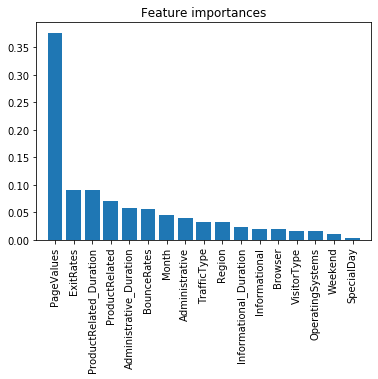

In [104]:
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Kesimpulan

Berdasarkan analisis yang telah dilakukan pada dataset online shopping dapat disimpulkan beberapa hal yaitu,
- Hanya sebesar 15.47% pembelian yang terjadi dari seluruh jumlah kungjungan online
- Kunjungan & pembelian online terjadi lebih banyak pada weekdays dibandingkan weekends
- Kunjungan & pembelian online terbanyak berasal dari user yang merupakan pengunjung berulang
- Kunjungan & pembelian online terbanyak berasal dari user menggunakan traffic type nomer 2
- Region 1 merupakan daerah asal user yang melakukan kunjungan & pembelian online terbanyak
- Browser 2 merupakan browser yang paling banyak digunakan oleh pengunjung dan pembeli online
- OS No. 2 merupakan OS yang paling banyak digunakan oleh pengunjung dan pembeli online
- Bulan November merupakan bulan dimana terjadi kunjungan online terbanyak, namun pembelian terbanyak terjadi pada bulan Mei

Berdasarkan model machine learning
- Model RandomForest menghasilkan akurasi tertinggi sebesar 90%
- Dan 5 feature paling berpengaruh dalam pembelian online adalah:
    - Page Values
    - Exit Rates
    - ProductRelated Duration
    - Product Related
    - Administrative Duration